With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print(np.random.rand(2))

[0.1599151  0.66038738]


In [10]:
inputs = np.array([[1,1],[2,2],[4,4],[5,5],[2,3]])
labels = np.array([0,0,1,1,0])

In [17]:
def activation(output):
    if output >= 0:
        return 1
    else:
        return 0

def predict(test,weights,bias):
    predictions = []
    wsum = np.dot(test,weights) + bias
    predictions.append(activation(wsum))
    return predictions

In [18]:
def training(inputs,labels):
    epochs = 100
    learn_rate = 0.1
    bias = 1
    weights = np.random.rand(2)
    wsum = 0
    for i in range(epochs):
        for j in range(len(inputs)):
            wsum = np.dot(inputs[j],weights) + bias

        predicted = activation(wsum)
        error = labels[j] - predicted

        weights = weights + learn_rate * error * inputs[j]

        bias = bias + learn_rate * error

    return weights,bias

In [23]:
nweights,nbias = training(inputs,labels)
print(nweights)
print(nbias)

[ 0.20726325 -0.53095441]
0.8


In [24]:
test = [3,4]
print(predict(test,nweights,nbias))

[0]


In [25]:
df = pd.DataFrame(inputs,columns=['X','Y'])
df['Labels'] = labels

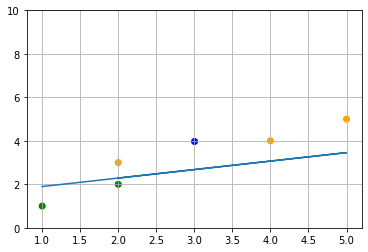

In [26]:
x = df['X']
y=(-nweights[0]/nweights[1])*df['X']-(-nbias/-nweights[1])
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylim(0, 10)
#plt.plot(df['X'],df['Y'],marker='o')
colors = np.where(df['Y'] > y, 'orange','green')
plt.scatter(x=3,y=4,color='blue')
plt.scatter(x=df['X'],y=df['Y'],c=colors)
plt.grid(True)
plt.show()